In [2]:
import cudf as cf
import matplotlib.pyplot as plt

eurgbp = cf.read_csv('/home/edoardocame/Desktop/python_dir/data/eurgbp-m1-bid-2015-01-01-2025-01-30T14:40.csv', index_col=0) 

eurgbp['returns'] = eurgbp['close'].pct_change() * 1000000
eurgbp['rolling_sd'] = eurgbp['returns'].rolling(window=1440).std()

eurgbp_before2024 = eurgbp[eurgbp.index < '2024-01-01']
print(eurgbp_before2024['rolling_sd'].mean())

139.71374938873876


### Uso i dati di ForexHistData.com
Provo a condurre gli stessi studi con altri dati per vedere quanto cambiano

In [3]:
import cudf as cf

# Load the data
eurgbp = cf.read_csv('/home/edoardocame/Desktop/python_dir/data/eurgbp_forexhistdata_2015_2023.csv')
eurgbp = eurgbp.drop(eurgbp.columns[:2], axis=1)

# Compute the returns
returns = eurgbp.iloc[:, 3].pct_change() * 1000000
rolling_sd = returns.rolling(window=1440).std()
rolling_sd.dropna(inplace=True) 
print(rolling_sd.mean())

143.80531917089584


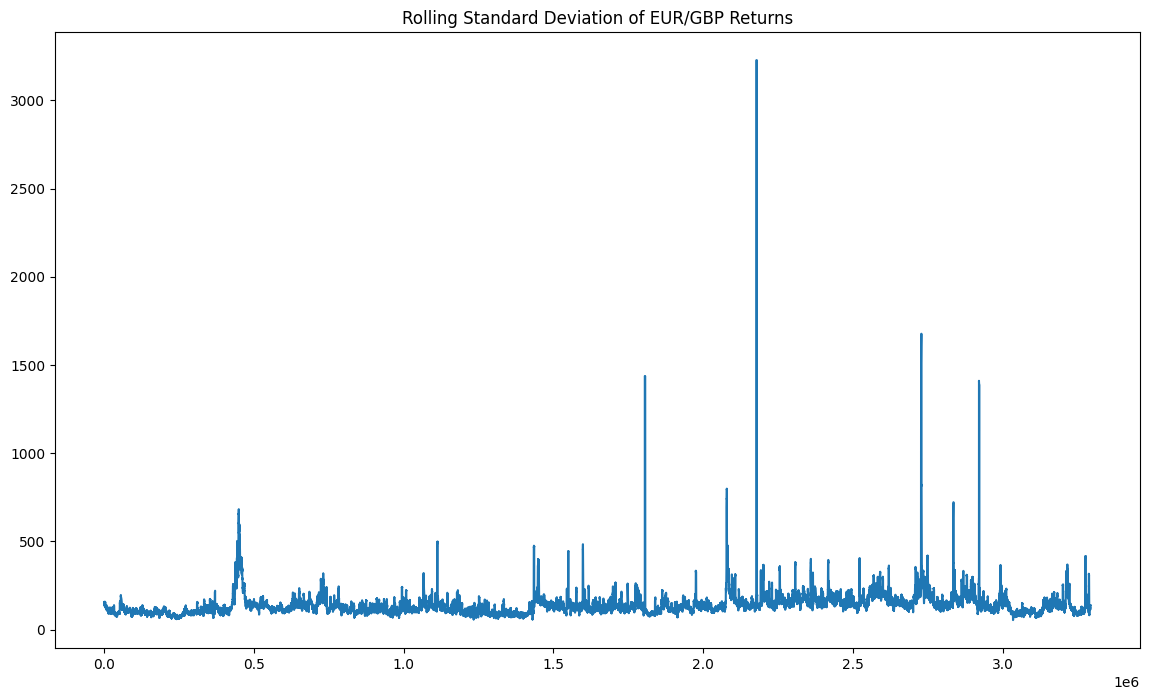

In [4]:
import matplotlib.pyplot as plt
rolling_sd.dropna(inplace=True)
plt.figure(figsize=(14, 8))
plt.plot(rolling_sd)
plt.title('Rolling Standard Deviation of EUR/GBP Returns')
plt.show()